In [1]:
def D2(dimension):
    """Used to make a matrix that enables D2*y(x)=I.
    
    We want each row to have 1,-2,1 in it with the right-most 1 being on the diagonal. The simplest way to do
    this is the start with an under-sized matrix"""
    import numpy as np
    
    # Generate the 0 matrix as our starting point, make it 2 rows/columns shorter, and make its diagonal 1's
    matrix = np.zeros((dimension-2,dimension-2), dtype = "int8")
    np.fill_diagonal(matrix,int(1))
    
    
    
    
    # Add a row of 0's to the top and column of 0's to the right
    row = np.zeros((dimension-2,1), dtype = "int8")
    matrix = np.hstack((matrix, row))

    column = np.zeros((1,dimension-1), dtype = "int8")
    matrix = np.vstack((column, matrix))
    
    # Replace the new diagonals with -2
    np.fill_diagonal(matrix,int(-2))
    
    
    
    
    # Add a row of 0's to the top and column of 0's to the right
    row = np.zeros((dimension-1,1), dtype = "int8")
    matrix = np.hstack((matrix, row))

    column = np.zeros((1,dimension), dtype = "int8")
    matrix = np.vstack((column, matrix))
    
    # Replace the new diagonals with 1
    np.fill_diagonal(matrix,int(1))
    
    
    
    
    return matrix

In [2]:
def yppx_to_fx(initial_y, initial_yp, x_max, interv_num):
    """For any d2y/dx2="f(x)", we find that after some math, we get y(x+h)-2y(x)+y(x-h)=h^2*"f(x)",
    which becomes D2*y(x)=h^2*"f(x)"*[y(0);y'(0);1;1;...].
    This gives us y(x)=h^2*D2^{-1}*[y(0);y'(0);f(x_0);f(x_1);...;f(x_{n-2})]"""
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.linalg import lu_factor
    from scipy.linalg import lu_solve
    from time import time
    
    begin = round(time(),2)
    
    # Make our array of x-inputs and our interval width constant
    x_min = 0
    x_val = np.linspace(x_min, x_max, interv_num+1)
    interv_width = (x_max - x_min) / interv_num
    
    
    
    
    # Make our array of dy/dx outputs
    # IMPORTANT
    ypp_val = x_val ** 3
    
    
    
    
    # Assemble our I-Matrix of the form
    #       [ h*y'(x_0)+y(x_0) ; h^2*f(x_1))-y(x_0) ; h^2*f(x_2) ; ... ; h^2*f(x_n-1) ]
    # Start with everything being h^2*f(x)
    i_matrix = (interv_width ** 2) * ypp_val
    
    # Make appropriate alterations to the first, second, and last values
    i_matrix[0] = interv_width * initial_yp + initial_y
    i_matrix[1] -= initial_y
    i_matrix = i_matrix[:-1]
    
    # Also generate our D2 matrix
    D2_matrix = D2(interv_num)

    
    
    
    # We know have D2y(x) = I, which is an equation of the form Ax=B
    # It is more efficient to find the LU decomposition of A in Ax=B than solve it than finding the inverse
    lu, piv = lu_factor(D2_matrix)
    y_val = lu_solve((lu, piv), i_matrix)
    
    #Append our initial y-value since y_val is everything except the first value
    y_val = np.append( np.array([initial_y]) , y_val )
    
    
    
    # Plot our values and the EXACT SOLUTION
    plt.plot(x_val, y_val, color="black", linestyle="dotted")
    
    exact_y = (1/20) * x_val ** 5 + 2 * x_val + 4
    plt.plot(x_val, exact_y, color="black")
    
    
    
    
    # Set up cosmetic expectations and display the graph
    plt.grid()
    plt.xlabel("X-Axis")
    plt.ylabel("Y-Axis")
    plt.show()
    
    end = round(time(),2)
    print(f"Finished in {round(end-begin,2)} seconds.")

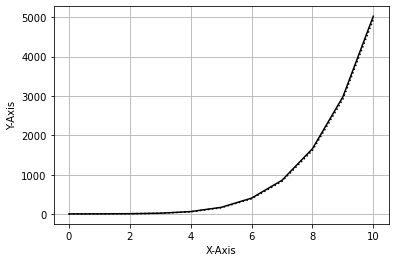

Finished in 0.11 seconds.


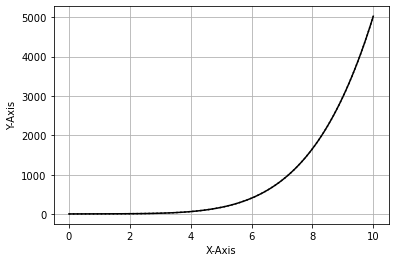

Finished in 0.09 seconds.


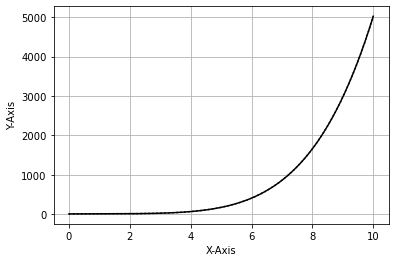

Finished in 0.17 seconds.


In [3]:
# Find the solution to y''(x)=x^3, y(0)=4, y'(0)=2, 0<x<10
# Format is func_diff2(initial_y, initial_yp, x_max, interv_num)
for i in range (3):
    yppx_to_fx(4, 2, 10, 10 ** (i+1))